<a href="https://colab.research.google.com/github/FeraMaks/test/blob/main/06_1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


# Initialisation

In [2]:
X_numpy, Y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 10)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
print(Y.shape)
Y = Y.view(Y.shape[0], 1)

torch.Size([100])


In [3]:
n_samples, n_features = X.shape

# Model prediction

In [4]:
input_size = n_features
output_size = 1

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    #define layers
    self.lin = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    return self.lin(x)


In [5]:
model = LinearRegression(input_size, output_size)

Loss

In [6]:
loss = nn.MSELoss()

#Training

In [7]:
lr = 0.01
n = 1000

optimizer = torch.optim.SGD(model.parameters(), lr = lr)

for epoch in range(n):
  #prediction
  H = model(X)
  #loss
  L = loss(Y, H)
  L.backward()
  #update
  optimizer.step()
  #zero gradients
  optimizer.zero_grad()

  if (epoch+1) % 100 == 0:
    [w,b] = model.parameters()
    print(f'epoch = {epoch+1}: w = {w[0][0]:.3f},loss = {L.item():.5f}')

epoch = 100: w = 56.948,loss = 143.48781
epoch = 200: w = 62.678,loss = 94.66936
epoch = 300: w = 63.287,loss = 94.03474
epoch = 400: w = 63.356,loss = 94.02420
epoch = 500: w = 63.364,loss = 94.02399
epoch = 600: w = 63.365,loss = 94.02399
epoch = 700: w = 63.366,loss = 94.02400
epoch = 800: w = 63.366,loss = 94.02400
epoch = 900: w = 63.366,loss = 94.02400
epoch = 1000: w = 63.366,loss = 94.02400


#Visualization

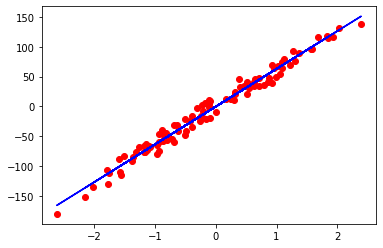

In [8]:
predictions = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predictions, 'b')